In [1]:
%pylab inline
from pandas import Series, DataFrame
import pandas_datareader.data as web
from app import create_app
from app.analysis import Quote, RISK_FREE_RATE_PER_DAY
from app.m1 import M1Portfolio
app = create_app()

Populating the interactive namespace from numpy and matplotlib


In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series(126)})
data = web.DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
data = DataFrame({
    '1. M1': m1,
    '2. S&P 500': data['SPY'],
    '3. CSI 300': data['ASHR'],
    '4. Alibaba': data['BABA'],
}).dropna()
for key in data.columns:
    data[key] *= 100 / data[key][0]

,count,mean,std,min,25%,50%,75%,max,sharpe,yield,drawdown,skewness,kurtosis
1. M1,63.0,0.045059,0.257605,-0.692841,-0.081434,0.069131,0.256668,0.596256,0.151808,2.048401,4.026318,-0.606710,0.909052
2. S&P 500,63.0,-0.029407,0.361549,-1.186224,-0.238772,-0.038118,0.234810,0.612189,-0.097800,-2.991154,6.022979,-0.580476,0.785052
3. CSI 300,63.0,-0.060476,0.584812,-1.971585,-0.321127,-0.029595,0.290334,1.023497,-0.113590,-6.028746,10.234841,-0.670194,1.366149
4. Alibaba,63.0,-0.033791,1.007076,-2.744218,-0.642746,0.137983,0.577554,2.293916,-0.039465,-7.293757,14.025963,-0.366595,0.119757


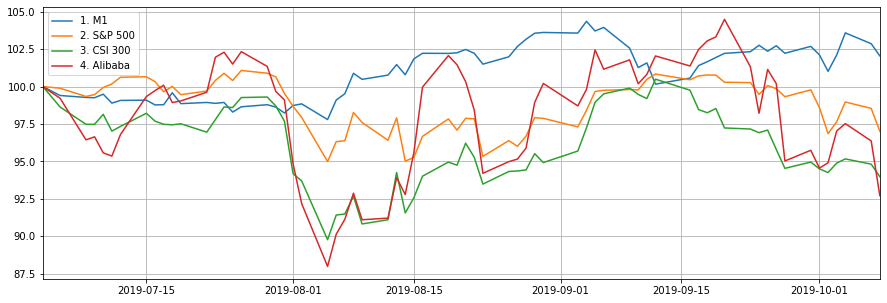

In [3]:
period = 5
data.plot(figsize=(15, 5), grid=1)
ret = data.rolling(period, period - 1).mean().pct_change() * 100
stat = ret.describe().T
stat['sharpe'] = (stat['mean'] - RISK_FREE_RATE_PER_DAY) / stat['std']
stat['yield'] = data.T[data.index[-1]] / data.T[data.index[0]] * 100 - 100
stat['drawdown'] = data.apply(Quote._max_drawdown)
stat['skewness'] = ret.skew()
stat['kurtosis'] = ret.kurt()
stat.sort_values('drawdown', ascending=True)

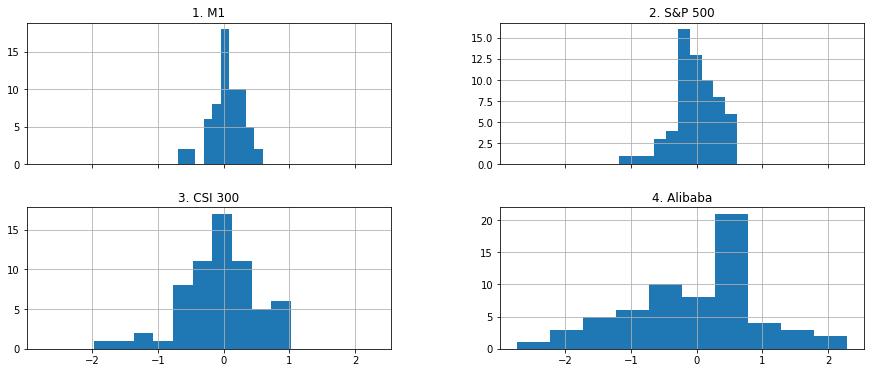

In [4]:
_ = ret.hist(sharex=1, figsize=(15, 6), layout=(2, 2))